<a href="https://colab.research.google.com/github/anirudhapratapsinghthakur-star/MEDI-AI/blob/main/prj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# then navigate to your folder
import os
data_dir = '/content/drive/MyDrive/skin diseases'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2
import os
import numpy as np
import pandas as pd
from tqdm import tqdm  # for progress bar
data_dir = '/content/drive/MyDrive/skin diseases'

data = []
labels = []

categories = os.listdir(data_dir)

for category in categories:
    path = os.path.join(data_dir, category)

    for img_name in tqdm(os.listdir(path)):
        img_path = os.path.join(path, img_name)
        try:
            # read image
            img = cv2.imread(img_path)
            if img is None:   # corrupted image check
                continue

            # convert color to RGB
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            # resize all images to same shape
            img = cv2.resize(img, (224, 224)) # Changed from 128, 128 to 224, 224

            # normalize (0–255) → (0–1)
            img = img / 255.0

            # append image and label
            data.append(img)
            labels.append(category)

        except Exception as e:
            print(f"Error with image {img_name}: {e}")


X = np.array(data)
y = np.array(labels)

print(X.shape, y.shape)

100%|██████████| 232/232 [00:00<00:00, 241.43it/s] 


(922, 224, 224, 3) (922,)


In [ ]:
import os
data_dir = '/content/drive/MyDrive/skin diseases'
print(os.listdir(data_dir))


['vitiligo', 'Healthy Skin', 'melasma', 'acne']


In [ ]:
import cv2
import os
from tqdm import tqdm

data_dir = '/content/drive/MyDrive/skin diseases'
data = []
labels = []

categories = os.listdir(data_dir)
print("Categories found:", categories)

for category in categories:
    path = os.path.join(data_dir, category)
    img_files = os.listdir(path)
    print(f"{category}: {len(img_files)} images found")

    for img_name in tqdm(img_files, desc=f"Loading {category}"):
        img_path = os.path.join(path, img_name)
        img = cv2.imread(img_path)
        if img is None:
            continue
        data.append(img)
        labels.append(category)

print("Unique labels loaded:", set(labels))


Categories found: ['vitiligo', 'Healthy Skin', 'melasma', 'acne']
vitiligo: 380 images found


Loading vitiligo: 100%|██████████| 380/380 [00:03<00:00, 97.77it/s] 


Healthy Skin: 352 images found


Loading Healthy Skin: 100%|██████████| 352/352 [00:08<00:00, 40.75it/s]


melasma: 187 images found


Loading melasma: 100%|██████████| 187/187 [00:03<00:00, 56.55it/s]


acne: 229 images found


Loading acne: 100%|██████████| 229/229 [00:00<00:00, 1807.98it/s]

Unique labels loaded: {'vitiligo', 'Healthy Skin', 'melasma'}


In [ ]:
import os
import shutil

# Path to your Acne folder
acne_path = '/content/dataset/acne'  # change if path differs

# Walk through all subfolders inside acne
for root, dirs, files in os.walk(acne_path):
    for file in files:
        if file.lower().endswith(('.jpg', '.jpeg', '.png')):
            src = os.path.join(root, file)
            dst = os.path.join(acne_path, file)

            # Avoid overwriting duplicate filenames
            if os.path.exists(dst):
                base, ext = os.path.splitext(file)
                i = 1
                while os.path.exists(os.path.join(acne_path, f"{base}_{i}{ext}")):
                    i += 1
                dst = os.path.join(acne_path, f"{base}_{i}{ext}")

            shutil.move(src, dst)

print("✅ All acne images moved to:", acne_path)

✅ All acne images moved to: /content/dataset/acne


In [ ]:
for root, dirs, files in os.walk(acne_path, topdown=False):
    for dir in dirs:
        dir_path = os.path.join(root, dir)
        if not os.listdir(dir_path):  # if empty
            os.rmdir(dir_path)

print("🧹 Empty folders removed from acne/")

🧹 Empty folders removed from acne/


In [ ]:
import os, shutil

acne_path = '/content/drive/MyDrive/skin diseases/acne'  # ensure this is correct!

if not os.path.exists(acne_path):
    raise FileNotFoundError("❌ Acne folder path not found. Check your directory.")

for root, dirs, files in os.walk(acne_path):
    for file in files:
        if file.lower().endswith(('.jpg', '.jpeg', '.png', '.jfif')):
            src = os.path.join(root, file)
            dst = os.path.join(acne_path, file)
            if src != dst:  # avoid moving same-level files
                shutil.move(src, dst)

print("✅ All acne images moved successfully!")

✅ All acne images moved successfully!


In [ ]:
import os, shutil

acne_path = '/content/drive/MyDrive/skin diseases/acne'

# Go deep into every subfolder
for root, dirs, files in os.walk(acne_path):
    for file in files:
        if file.lower().endswith(('.jpg', '.jpeg', '.png', '.jfif')):
            src = os.path.join(root, file)
            dst = os.path.join(acne_path, file)
            if src != dst:
                # Avoid overwriting duplicate names
                if os.path.exists(dst):
                    base, ext = os.path.splitext(file)
                    i = 1
                    while os.path.exists(os.path.join(acne_path, f"{base}_{i}{ext}")):
                        i += 1
                    dst = os.path.join(acne_path, f"{base}_{i}{ext}")
                shutil.move(src, dst)

print("✅ All nested acne images moved successfully to:", acne_path)

✅ All nested acne images moved successfully to: /content/drive/MyDrive/skin diseases/acne


In [ ]:
import os

base_dir = '/content/drive/MyDrive/skin diseases'
split_dir = '/content/drive/MyDrive/skin_disease_split'  # new folder to hold train/test sets

categories = ['Healthy Skin', 'melasma', 'vitiligo', 'acne']
for folder in ['train', 'test']:
    for category in categories:
        os.makedirs(os.path.join(split_dir, folder, category), exist_ok=True)

print("✅ Train/Test folders created!")


✅ Train/Test folders created!


In [ ]:
import shutil
import random

split_ratio = 0.8  # 80% training, 20% testing

for category in categories:
    cat_path = os.path.join(base_dir, category)
    images = [f for f in os.listdir(cat_path) if f.lower().endswith(('.jpg','.jpeg','.png','.jfif'))]
    random.shuffle(images)  # shuffle before splitting

    split_index = int(len(images) * split_ratio)
    train_images = images[:split_index]
    test_images = images[split_index:]

    # Copy to train folder
    for img in train_images:
        src = os.path.join(cat_path, img)
        dst = os.path.join(split_dir, 'train', category, img)
        shutil.copy2(src, dst)

    # Copy to test folder
    for img in test_images:
        src = os.path.join(cat_path, img)
        dst = os.path.join(split_dir, 'test', category, img)
        shutil.copy2(src, dst)

    print(f"✅ {category}: {len(train_images)} train, {len(test_images)} test")

print("🎯 Dataset splitting complete!")


✅ Healthy Skin: 281 train, 71 test
✅ melasma: 149 train, 38 test
✅ vitiligo: 304 train, 76 test
✅ acne: 2 train, 1 test
🎯 Dataset splitting complete!


In [ ]:
for folder in ['train', 'test']:
    print(f"\n{folder.upper()} SET:")
    for category in categories:
        cat_folder = os.path.join(split_dir, folder, category)
        print(f"{category}: {len(os.listdir(cat_folder))} images")



TRAIN SET:
Healthy Skin: 281 images
melasma: 149 images
vitiligo: 304 images
acne: 2 images

TEST SET:
Healthy Skin: 71 images
melasma: 38 images
vitiligo: 76 images
acne: 1 images


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Assuming X and y are already loaded from the previous steps
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Encode the labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


num_classes = 4  # Healthy Skin, melasma, vitiligo, acne

y_train_cat = to_categorical(y_train_encoded, num_classes)
y_test_cat = to_categorical(y_test_encoded, num_classes)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train_cat shape:", y_train_cat.shape)
print("y_test_cat shape:", y_test_cat.shape)

X_train shape: (735, 128, 128, 3)
X_test shape: (184, 128, 128, 3)
y_train_cat shape: (735, 4)
y_test_cat shape: (184, 4)


In [ ]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224,224,3))
base_model.trainable = False  # freeze base model


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')  # 4 classes
])

model.summary()



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,468 (9.24 MB)

 Trainable params: 164,484 (642.52 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Assuming X and y are already loaded from the previous steps
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Encode the labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


num_classes = 4  # Healthy Skin, melasma, vitiligo, acne

y_train_cat = to_categorical(y_train_encoded, num_classes)
y_test_cat = to_categorical(y_test_encoded, num_classes)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train_cat shape:", y_train_cat.shape)
print("y_test_cat shape:", y_test_cat.shape)

X_train shape: (737, 224, 224, 3)
X_test shape: (185, 224, 224, 3)
y_train_cat shape: (737, 4)
y_test_cat shape: (185, 4)


In [ ]:
print("X_train shape:", X_train.shape)
print("y_train_cat shape:", y_train_cat.shape)
print("X_test shape:", X_test.shape)
print("y_test_cat shape:", y_test_cat.shape)
import os

for folder in ['train', 'test']:
    print(f"\n{folder.upper()} SET:")
    for category in categories:
        cat_folder = os.path.join(split_dir, folder, category)
        print(f"{category}: {len(os.listdir(cat_folder))} images")
        print("X_train:", type(X_train), "length:", len(X_train))
print("y_train:", type(y_train), "length:", len(y_train))




X_train shape: (737, 224, 224, 3)
y_train_cat shape: (737, 4)
X_test shape: (185, 224, 224, 3)
y_test_cat shape: (185, 4)

TRAIN SET:
vitiligo: 304 images
X_train: <class 'numpy.ndarray'> length: 737
Healthy Skin: 281 images
X_train: <class 'numpy.ndarray'> length: 737
melasma: 149 images
X_train: <class 'numpy.ndarray'> length: 737
acne: 2 images
X_train: <class 'numpy.ndarray'> length: 737

TEST SET:
vitiligo: 76 images
X_train: <class 'numpy.ndarray'> length: 737
Healthy Skin: 71 images
X_train: <class 'numpy.ndarray'> length: 737
melasma: 38 images
X_train: <class 'numpy.ndarray'> length: 737
acne: 1 images
X_train: <class 'numpy.ndarray'> length: 737
y_train: <class 'numpy.ndarray'> length: 737


In [ ]:
print("X_train:", type(X_train), "length:", len(X_train))
print("y_train:", type(y_train), "length:", len(y_train))


X_train: <class 'numpy.ndarray'> length: 737
y_train: <class 'numpy.ndarray'> length: 737


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)  # assuming you have loaded X_test and y_test

print("Label mapping:", dict(zip(le.classes_, le.transform(le.classes_))))


Label mapping: {np.str_('Healthy Skin'): np.int64(0), np.str_('acne'): np.int64(1), np.str_('melasma'): np.int64(2), np.str_('vitiligo'): np.int64(3)}


In [ ]:
from tensorflow.keras.utils import to_categorical

num_classes = len(le.classes_)  # should be 4
y_train_cat = to_categorical(y_train_encoded, num_classes)
y_test_cat = to_categorical(y_test_encoded, num_classes)

print("y_train_cat shape:", y_train_cat.shape)
print("y_test_cat shape:", y_test_cat.shape)


y_train_cat shape: (737, 4)
y_test_cat shape: (185, 4)


In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0


Loading acne: 100%|██████████| 232/232 [00:34<00:00,  6.72it/s] 


Dataset shape: (922, 224, 224, 3)
Labels sample: ['Healthy Skin' 'acne' 'melasma' 'vitiligo']
Number of classes: 4
Label mapping: {np.str_('Healthy Skin'): np.int64(0), np.str_('acne'): np.int64(1), np.str_('melasma'): np.int64(2), np.str_('vitiligo'): np.int64(3)}
Training samples: 737
Testing samples: 185


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,468 (9.24 MB)

 Trainable params: 164,484 (642.52 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 61s 2s/step - accuracy: 0.3029 - loss: 1.8046 - val_accuracy: 0.7946 - val_loss: 0.6174
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.7663 - loss: 0.6176 - val_accuracy: 0.9297 - val_loss: 0.3029
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.8851 - loss: 0.3580 - val_accuracy: 0.9405 - val_loss: 0.2308
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - accuracy: 0.8957 - loss: 0.3221 - val_accuracy: 0.9459 - val_loss: 0.1983
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.9192 - loss: 0.2394 - val_accuracy: 0.9514 - val_loss: 0.1776
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.9405 - loss: 0.1876 - val_accuracy: 0.9514 - val_loss: 0.1602
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.9365 - loss: 0.1730 - val_accuracy: 0.9568 - val_loss: 0.1527
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.9460 - loss: 0.1881 - val_accuracy: 0.9568 - val_loss:

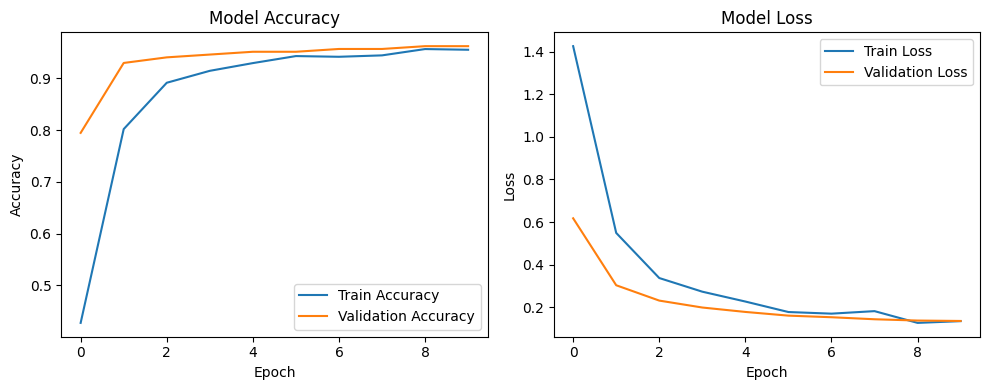

6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.9569 - loss: 0.1715
✅ Test Accuracy: 0.9622
✅ Test Loss: 0.1352


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import cv2 # Added for image loading
import os # Added for path operations
from tqdm import tqdm # Added for progress bar

# -----------------------------
# STEP 2: Load Your Dataset
# -----------------------------

# --- START of inserted data loading logic ---
data_dir = '/content/drive/MyDrive/skin diseases' # Reusing data_dir from notebook state
data = []
labels = []

categories = os.listdir(data_dir)

for category in categories:
    path = os.path.join(data_dir, category)

    for img_name in tqdm(os.listdir(path), desc=f"Loading {category}"):
        img_path = os.path.join(path, img_name)
        try:
            # read image
            img = cv2.imread(img_path)
            if img is None:   # corrupted image check
                continue

            # convert color to RGB
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            # resize all images to same shape
            img = cv2.resize(img, (224, 224)) # Consistent with MobileNetV2 input_shape

            # Do NOT normalize here, as it's done in Step 5

            # append image and label
            data.append(img)
            labels.append(category)

        except Exception as e:
            print(f"Error with image {img_name}: {e}")
# --- END of inserted data loading logic ---

X = np.array(data)       # images as numpy array
y = np.array(labels)     # labels as numpy array

print("Dataset shape:", X.shape)
print("Labels sample:", np.unique(y))

# -----------------------------
# STEP 3: Preprocess Labels
# -----------------------------
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_cat = to_categorical(y_encoded)

num_classes = y_cat.shape[1]
print("Number of classes:", num_classes)
print("Label mapping:", dict(zip(le.classes_, le.transform(le.classes_))))

# -----------------------------
# STEP 4: Split Dataset
# -----------------------------
X_train, X_test, y_train_cat, y_test_cat = train_test_split(
    X, y_cat, test_size=0.2, random_state=42, stratify=y_cat
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

# -----------------------------
# STEP 5: Normalize Image Data
# -----------------------------
X_train = X_train / 255.0
X_test = X_test / 255.0

# -----------------------------
# STEP 6: Build MobileNetV2 Model
# -----------------------------
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224,224,3))
base_model.trainable = False  # freeze pre-trained layers

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# -----------------------------
# STEP 7: Train Model
# -----------------------------
history = model.fit(
    X_train, y_train_cat,
    validation_data=(X_test, y_test_cat),
    epochs=10,
    batch_size=32
)

# -----------------------------
# STEP 8: Plot Accuracy & Loss
# -----------------------------
plt.figure(figsize=(10,4))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# -----------------------------
# STEP 9: Evaluate Model
# -----------------------------
test_loss, test_acc = model.evaluate(X_test, y_test_cat)
print(f"✅ Test Accuracy: {test_acc:.4f}")
print(f"✅ Test Loss: {test_loss:.4f}")

**knn using**

Loading acne: 100%|██████████| 232/232 [00:01<00:00, 153.60it/s] 


Dataset shape: (922, 224, 224, 3)
Unique labels: ['Healthy Skin' 'acne' 'melasma' 'vitiligo']
Label mapping: {np.str_('Healthy Skin'): np.int64(0), np.str_('acne'): np.int64(1), np.str_('melasma'): np.int64(2), np.str_('vitiligo'): np.int64(3)}
Extracting features for training set...
24/24 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step
Extracting features for test set...
6/6 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step
Feature shape: (737, 1280)
✅ Test Accuracy: 0.9622

Classification Report:
               precision    recall  f1-score   support

Healthy Skin       0.96      0.94      0.95        71
        acne       1.00      1.00      1.00         1
     melasma       0.90      1.00      0.95        37
    vitiligo       1.00      0.96      0.98        76

    accuracy                           0.96       185
   macro avg       0.96      0.98      0.97       185
weighted avg       0.96      0.96      0.96       185



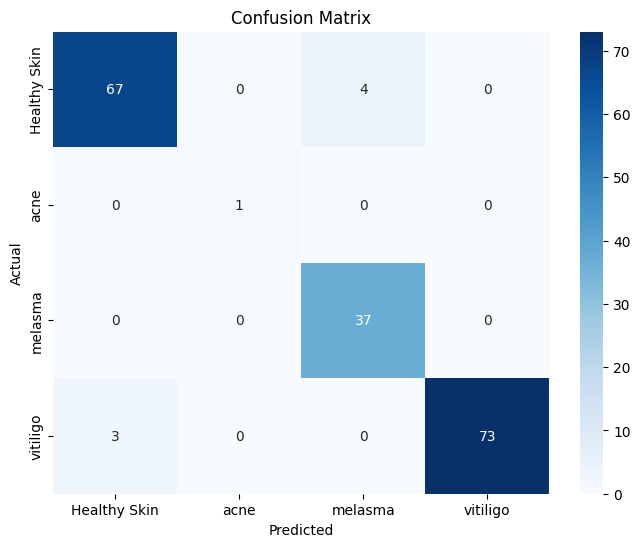

In [ ]:
# -----------------------------
# STEP 1: Import Libraries
# -----------------------------
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import numpy as np
import cv2
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# STEP 2: Load Dataset
# -----------------------------
data_dir = '/content/drive/MyDrive/skin diseases'
data = []
labels = []

categories = os.listdir(data_dir)

for category in categories:
    path = os.path.join(data_dir, category)
    for img_name in tqdm(os.listdir(path), desc=f"Loading {category}"):
        img_path = os.path.join(path, img_name)
        try:
            img = cv2.imread(img_path)
            if img is None:
                continue
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (224, 224))
            data.append(img)
            labels.append(category)
        except Exception as e:
            print(f"Error with image {img_name}: {e}")

X = np.array(data)
y = np.array(labels)

print("Dataset shape:", X.shape)
print("Unique labels:", np.unique(y))

# -----------------------------
# STEP 3: Preprocess & Encode Labels
# -----------------------------
le = LabelEncoder()
y_encoded = le.fit_transform(y)
print("Label mapping:", dict(zip(le.classes_, le.transform(le.classes_))))

# -----------------------------
# STEP 4: Split Dataset
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# -----------------------------
# STEP 5: Normalize & Preprocess Images
# -----------------------------
X_train = preprocess_input(X_train)
X_test = preprocess_input(X_test)

# -----------------------------
# STEP 6: Feature Extraction using MobileNetV2
# -----------------------------
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224,224,3))
x = GlobalAveragePooling2D()(base_model.output)
feature_extractor = Model(inputs=base_model.input, outputs=x)

# Freeze the layers (no training)
for layer in base_model.layers:
    layer.trainable = False

# Extract features
print("Extracting features for training set...")
X_train_features = feature_extractor.predict(X_train, batch_size=32, verbose=1)
print("Extracting features for test set...")
X_test_features = feature_extractor.predict(X_test, batch_size=32, verbose=1)

print("Feature shape:", X_train_features.shape)

# -----------------------------
# STEP 7: Train KNN Classifier
# -----------------------------
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train_features, y_train)

# -----------------------------
# STEP 8: Predict & Evaluate
# -----------------------------
y_pred = knn.predict(X_test_features)

acc = accuracy_score(y_test, y_pred)
print(f"✅ Test Accuracy: {acc:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


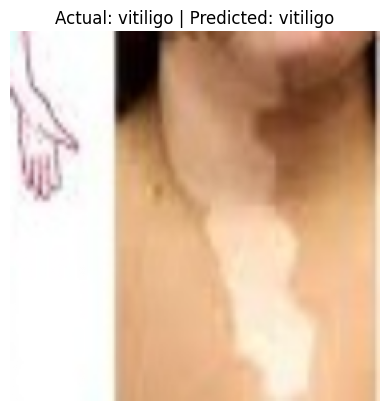

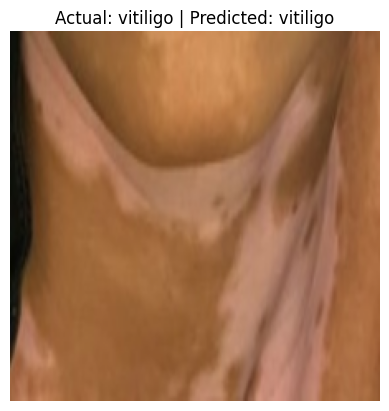

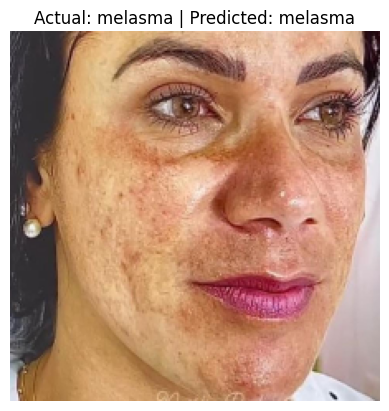

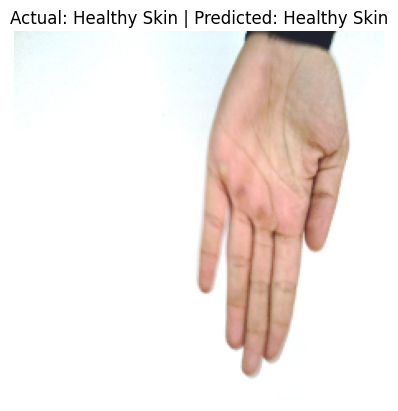

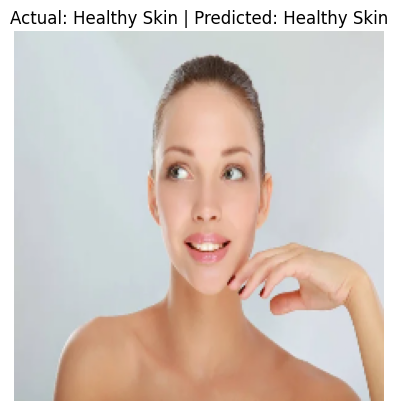

In [ ]:
import random

# Pick a few random test samples
indices = random.sample(range(len(X_test)), 5)

for i in indices:
    img = X_test[i]
    true_label = le.inverse_transform([y_test[i]])[0]
    pred_label = le.inverse_transform([y_pred[i]])[0]

    plt.imshow((img + 1) / 2)  # reverse preprocess_input for display
    plt.title(f"Actual: {true_label} | Predicted: {pred_label}")
    plt.axis('off')
    plt.show()


In [ ]:
import os

test_img_path = "/content/test_sample.jpg"

# Check if the image file exists
if not os.path.exists(test_img_path):
    print(f"Error: Image file not found at {test_img_path}")
else:
    # Load and preprocess
    img = cv2.imread(test_img_path)
    if img is None:
        print(f"Error: Could not load image from {test_img_path}. It might be corrupted.")
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_resized = cv2.resize(img, (224, 224))
        img_preprocessed = preprocess_input(np.expand_dims(img_resized, axis=0))

        # Extract features
        img_feature = feature_extractor.predict(img_preprocessed)

        # Predict
        pred = knn.predict(img_feature)
        pred_label = le.inverse_transform(pred)[0]
        print("Predicted disease:", pred_label)


Error: Image file not found at /content/test_sample.jpg
